# Holding vs trading as an investment strategy, naive 

H0 = Trading proft > Holding profit

In [118]:
import pandas as pd
import yfinance as yf
import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import argrelextrema


I'll use Microsoft stock price as an example, you can use this for any other time series. 

In [119]:
#Starting from today, to a year ago
start = datetime.datetime.now() - datetime.timedelta(days=365)
end = datetime.datetime.now()

tickerSymbol = 'MSFT'
tickerData = yf.Ticker(tickerSymbol)

df = tickerData.history(period = '1d', start = start, end = end)

In [120]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30,150.906491,158.984406,148.500928,158.618118,63420300,0.0,0
2020-03-31,157.796460,163.122343,154.985034,156.123474,77927200,0.0,0
2020-04-01,151.460850,156.163066,149.302787,150.579803,57969900,0.0,0
2020-04-02,150.332329,153.915908,148.847419,153.698120,49630700,0.0,0
2020-04-03,153.539729,155.796792,150.659000,152.282501,41243300,0.0,0
...,...,...,...,...,...,...,...
2021-03-22,230.270004,236.899994,230.139999,235.990005,30127000,0.0,0
2021-03-23,237.490005,241.050003,237.070007,237.580002,31638400,0.0,0
2021-03-24,237.850006,238.000000,235.320007,235.460007,25620100,0.0,0


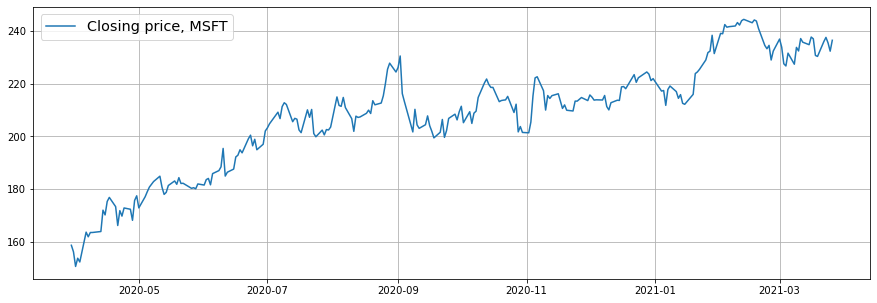

In [121]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"],label="Closing price, MSFT")
plt.grid()
plt.legend(loc='upper left',fontsize="x-large")

I'll add in the local minima and local maxima points into the plot.

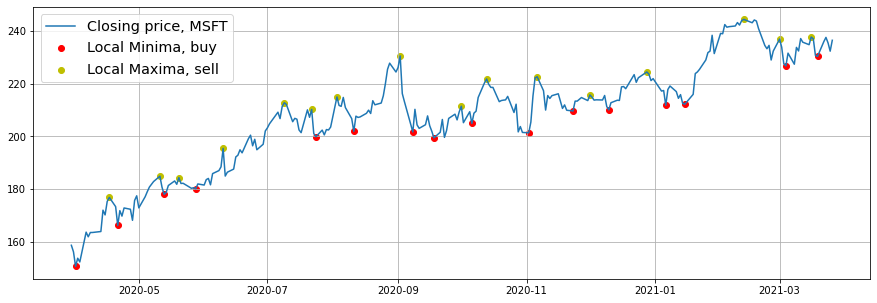

In [130]:
#Identify local minima and maxima
sensitivity = 5 #Lower number = more sensitive = more accurate trading

df['min'] = df.iloc[argrelextrema(df['Close'].values, np.less_equal,
                    order=sensitivity)[0]]['Close']

df['max'] = df.iloc[argrelextrema(df['Close'].values, np.greater_equal,
                    order=sensitivity)[0]]['Close']


#Plot
plt.figure(figsize=(15,5))
plt.scatter(df.index, df['min'], c='r', label = 'Local Minima, buy')
plt.scatter(df.index, df['max'], c='y', label = 'Local Maxima, sell')
plt.plot(df["Close"],label="Closing price, MSFT")
plt.grid()
plt.legend(loc='upper left',fontsize="x-large")

In [131]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,min,max
Date,,,,,,,,,
2020-03-30,150.906491,158.984406,148.500928,158.618118,63420300,0.0,0,NaN,NaN
2020-03-31,157.796460,163.122343,154.985034,156.123474,77927200,0.0,0,NaN,NaN
2020-04-01,151.460850,156.163066,149.302787,150.579803,57969900,0.0,0,150.579803,NaN
2020-04-02,150.332329,153.915908,148.847419,153.698120,49630700,0.0,0,NaN,NaN
2020-04-03,153.539729,155.796792,150.659000,152.282501,41243300,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-03-22,230.270004,236.899994,230.139999,235.990005,30127000,0.0,0,NaN,NaN
2021-03-23,237.490005,241.050003,237.070007,237.580002,31638400,0.0,0,NaN,NaN
2021-03-24,237.850006,238.000000,235.320007,235.460007,25620100,0.0,0,NaN,NaN


# Hold

Assume you held for 1 year, and then sold.

In [132]:
profit_hold = df['Close'][-1] - df['Close'][0]

In [133]:
profit_hold

77.86187744140625

# Trade

Testing 'buy low, sell high'. 

You can change trade frequency by changing the sensitivity variable, as in the real world no trader can perfectly know when to sell/buy. 

In [134]:
sell_total = df.loc[df['max'].notnull(), 'Close'].sum()

buy_total = df.loc[df['min'].notnull(), 'Close'].sum()

In [135]:
profit_trade = sell_total - buy_total

In [136]:
profit_trade

240.4122314453125

# Thoughts

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-03-30 to 2021-03-26
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    int64  
 7   min           16 non-null     float64
 8   max           16 non-null     float64
dtypes: float64(7), int64(2)
memory usage: 19.6 KB


Even though the trade profit is higher than hold profit, the methodology is nothing to ride home about. Just looking at local minima and maxima and summing them up is an extremely naive way to go about it. Ideally local minimas and maximas should alternate, otherwise the analysis is moot, (unless you short sell). 

And changing the sensitivity variable changes the results by a whole lot.

I will have to come back sometime later and fix that issue, it's going to take A LOT of code.